## Importing Libraries

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## loading dataset

In [217]:
data = pd.read_excel('Dataset_cs1.xlsx')
data.head()

,draw,Date,below_450,above_450,total,CRS
0,Draw 81,2010-01-01,71211.0,1607.0,72818.0,446.0
1,Draw 82,2024-01-01,72307.0,998.0,73305.0,444.0
2,Draw 83,2007-02-01,73112.0,955.0,74067.0,442.0
3,Draw 84,2021-02-01,74778.0,1025.0,75803.0,442.0
4,Draw 85,2014-03-01,75456.0,2676.0,78132.0,456.0


## Data Preprocessing

In [218]:
# As we can see, the Date column in not formatted properly
#because dates got conveted into years and automatically we got 01 as date for all the entries
data

,draw,Date,below_450,above_450,total,CRS
0,Draw 81,2010-01-01,71211.000000,1607.0,72818.000000,446.0
1,Draw 82,2024-01-01,72307.000000,998.0,73305.000000,444.0
2,Draw 83,2007-02-01,73112.000000,955.0,74067.000000,442.0
3,Draw 84,2021-02-01,74778.000000,1025.0,75803.000000,442.0
4,Draw 85,2014-03-01,75456.000000,2676.0,78132.000000,456.0
5,Draw 86,2026-03-01,76453.000000,1355.0,77808.000000,446.0
6,Draw 87,2011-04-01,78000.000000,1420.0,79420.000000,444.0
7,Draw 88,2025-04-01,80002.000000,1071.0,81073.000000,441.0
8,Draw 89,2009-05-01,82123.000000,1321.0,83444.000000,441.0
9,Draw 90,2023-05-01,84500.000000,1056.0,85556.000000,440.0


### converting Date column to Datetime format first
##### date_1 are 2018 entries, date_2 and 3 are 2019 and 2020 entries

In [219]:
date_1 = pd.to_datetime(data['Date'][:25], format = ('%Y-%m-%d'))
date_1

0    2010-01-01
1    2024-01-01
2    2007-02-01
3    2021-02-01
4    2014-03-01
5    2026-03-01
6    2011-04-01
7    2025-04-01
8    2009-05-01
9    2023-05-01
10   2013-06-01
11   2025-06-01
12   2011-07-01
13   2025-07-01
14   2008-08-01
15   2022-08-01
16   2005-09-01
17   2019-09-01
18   2003-10-01
19   2015-10-01
20   2029-10-01
21   2014-11-01
22   2028-11-01
23   2012-12-01
24   2019-12-01
Name: Date, dtype: datetime64[ns]

In [220]:
date_2 = pd.to_datetime(data['Date'][26:50], format = ('%Y-%m-%d'))
date_3 = pd.to_datetime(data['Date'][51:], format = ('%Y-%m-%d'))
print(len(date_2))
print(len(date_3))

24
11


##### converting datetime to string so that we ccan remove first and last to numbers

In [221]:
date_1 = date_1.apply(lambda x: x.strftime('%Y-%m-%d'))
date_2 = date_2.apply(lambda x: x.strftime('%Y-%m-%d'))
date_3 = date_3.apply(lambda x: x.strftime('%Y-%m-%d'))
date_3

51    2008-01-01
52    2022-01-01
53    2005-02-01
54    2019-02-01
55    2004-03-01
56    2002-09-01
57    2016-09-01
58    1930-09-01
59    2014-10-01
60    2005-11-01
61    2018-11-01
Name: Date, dtype: object

##### applying string slicing to just fetch the right middle values, hence removing first and last incorrect values

In [222]:
date_1 = date_1.apply(lambda x: x[2:7])
date_1

0     10-01
1     24-01
2     07-02
3     21-02
4     14-03
5     26-03
6     11-04
7     25-04
8     09-05
9     23-05
10    13-06
11    25-06
12    11-07
13    25-07
14    08-08
15    22-08
16    05-09
17    19-09
18    03-10
19    15-10
20    29-10
21    14-11
22    28-11
23    12-12
24    19-12
Name: Date, dtype: object

In [223]:
date_2= date_2.apply(lambda x: x[2:7])
date_3= date_3.apply(lambda x: x[2:7])

##### adding 2018, 2019 and 2020 to date_1, date_2 and date_3 series respectively

In [224]:
date_1 = date_1.apply(lambda x :x+str('-2018'))
date_1

0     10-01-2018
1     24-01-2018
2     07-02-2018
3     21-02-2018
4     14-03-2018
5     26-03-2018
6     11-04-2018
7     25-04-2018
8     09-05-2018
9     23-05-2018
10    13-06-2018
11    25-06-2018
12    11-07-2018
13    25-07-2018
14    08-08-2018
15    22-08-2018
16    05-09-2018
17    19-09-2018
18    03-10-2018
19    15-10-2018
20    29-10-2018
21    14-11-2018
22    28-11-2018
23    12-12-2018
24    19-12-2018
Name: Date, dtype: object

In [225]:
date_2 = date_2.apply(lambda x :x+str('-2019'))
date_3 = date_3.apply(lambda x :x+str('-2020'))
date_3

51    08-01-2020
52    22-01-2020
53    05-02-2020
54    19-02-2020
55    04-03-2020
56    02-09-2020
57    16-09-2020
58    30-09-2020
59    14-10-2020
60    05-11-2020
61    18-11-2020
Name: Date, dtype: object

#####  Concatinating all the date series to make one final date feature

In [226]:
date = pd.concat([date_1,date_2, date_3])
date

0     10-01-2018
1     24-01-2018
2     07-02-2018
3     21-02-2018
4     14-03-2018
5     26-03-2018
6     11-04-2018
7     25-04-2018
8     09-05-2018
9     23-05-2018
10    13-06-2018
11    25-06-2018
12    11-07-2018
13    25-07-2018
14    08-08-2018
15    22-08-2018
16    05-09-2018
17    19-09-2018
18    03-10-2018
19    15-10-2018
20    29-10-2018
21    14-11-2018
22    28-11-2018
23    12-12-2018
24    19-12-2018
26    09-01-2019
27    23-01-2019
28    30-01-2019
29    20-02-2019
30    06-03-2019
31    20-03-2019
32    03-04-2019
33    17-04-2019
34    01-05-2019
35    29-05-2019
36    12-06-2019
37    26-06-2019
38    10-07-2019
39    24-07-2019
40    12-08-2019
41    20-08-2019
42    04-09-2019
43    18-09-2019
44    02-10-2019
45    30-10-2019
46    13-11-2019
47    27-11-2019
48    11-12-2019
49    19-12-2019
51    08-01-2020
52    22-01-2020
53    05-02-2020
54    19-02-2020
55    04-03-2020
56    02-09-2020
57    16-09-2020
58    30-09-2020
59    14-10-2020
60    05-11-20

##### converting this series back t0 datetime

In [227]:
date = pd.to_datetime(date, format = ('%d-%m-%Y'))
date

0    2018-01-10
1    2018-01-24
2    2018-02-07
3    2018-02-21
4    2018-03-14
5    2018-03-26
6    2018-04-11
7    2018-04-25
8    2018-05-09
9    2018-05-23
10   2018-06-13
11   2018-06-25
12   2018-07-11
13   2018-07-25
14   2018-08-08
15   2018-08-22
16   2018-09-05
17   2018-09-19
18   2018-10-03
19   2018-10-15
20   2018-10-29
21   2018-11-14
22   2018-11-28
23   2018-12-12
24   2018-12-19
26   2019-01-09
27   2019-01-23
28   2019-01-30
29   2019-02-20
30   2019-03-06
31   2019-03-20
32   2019-04-03
33   2019-04-17
34   2019-05-01
35   2019-05-29
36   2019-06-12
37   2019-06-26
38   2019-07-10
39   2019-07-24
40   2019-08-12
41   2019-08-20
42   2019-09-04
43   2019-09-18
44   2019-10-02
45   2019-10-30
46   2019-11-13
47   2019-11-27
48   2019-12-11
49   2019-12-19
51   2020-01-08
52   2020-01-22
53   2020-02-05
54   2020-02-19
55   2020-03-04
56   2020-09-02
57   2020-09-16
58   2020-09-30
59   2020-10-14
60   2020-11-05
61   2020-11-18
Name: Date, dtype: datetime64[ns]

#### adding this series to data table

In [228]:
data.columns

Index(['draw', 'Date', 'below_450', 'above_450', 'total', 'CRS'], dtype='object')

In [229]:
#removing old Date column from data 
data = data[['draw', 'below_450', 'above_450', 'total', 'CRS']]
data.head()

,draw,below_450,above_450,total,CRS
0,Draw 81,71211.0,1607.0,72818.0,446.0
1,Draw 82,72307.0,998.0,73305.0,444.0
2,Draw 83,73112.0,955.0,74067.0,442.0
3,Draw 84,74778.0,1025.0,75803.0,442.0
4,Draw 85,75456.0,2676.0,78132.0,456.0


##### concaticating rectified date series to data

In [230]:
data = pd.concat([data, date], axis=1)
data

,draw,below_450,above_450,total,CRS,Date
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23


#### Checking missing values

In [231]:
data.describe()

,below_450,above_450,total,CRS
count,60.000000,60.000000,60.000000,60.000000
mean,99598.173810,7769.083333,107367.257143,455.200000
std,15764.561402,8585.344375,23460.524536,12.912745
min,71211.000000,955.000000,72818.000000,438.000000
25%,86759.250000,1410.750000,88530.750000,442.000000
50%,97500.000000,2453.000000,99885.000000,451.500000
75%,116323.750000,14424.750000,131679.500000,470.000000
max,122390.000000,29149.000000,146965.000000,478.000000


In [232]:
data.isnull().values.any()

True

In [233]:
data.columns.values

array(['draw', 'below_450', 'above_450', 'total', 'CRS', 'Date'],
      dtype=object)

In [234]:
data.shape[0]

62

In [235]:
data.isna().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27    False
28    False
29    False
      ...  
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

In [236]:
#rows with NAN
data_na = data[data.isna().any(axis=1)]
data_na

,draw,below_450,above_450,total,CRS,Date
25,NaN,NaN,NaN,NaN,NaN,NaT
50,NaN,NaN,NaN,NaN,NaN,NaT


In [237]:
# removing rows with nan
data = data.dropna()
data = data.reset_index(drop=True)
data

,draw,below_450,above_450,total,CRS,Date
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23


### Exploratory Data Analysis

In [238]:
#checking correlation
data.corr()

,below_450,above_450,total,CRS
below_450,1.000000,0.842913,0.980424,0.890761
above_450,0.842913,1.000000,0.932353,0.875612
total,0.980424,0.932353,1.000000,0.918986
CRS,0.890761,0.875612,0.918986,1.000000


#### Visualizing the correlation of featues using heatmap

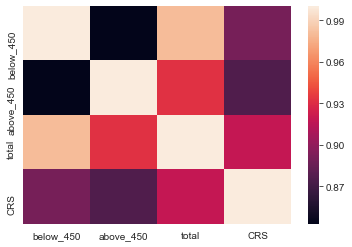

In [239]:
sns.heatmap(data.corr())
plt.show()

#### Visualizing the correlation of featues with target variable using scatter plot

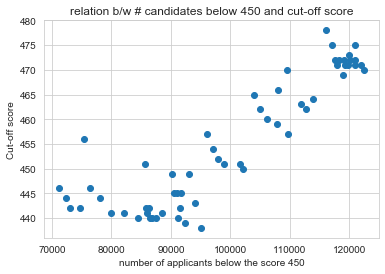

In [240]:
#scatter plot for below_450 and CRS
plt.scatter(data['below_450'], data['CRS'])
plt.xlabel('number of applicants below the score 450')
plt.ylabel('Cut-off score')
plt.title('relation b/w # candidates below 450 and cut-off score')
plt.show()

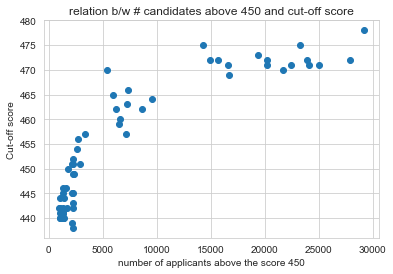

In [241]:
#scatter plot for above_450 and CRS
plt.scatter(data['above_450'], data['CRS'])
plt.xlabel('number of applicants above the score 450')
plt.ylabel('Cut-off score')
plt.title('relation b/w # candidates above 450 and cut-off score')
plt.show()

##### observation:-
1. we can see from first plot that the CRS inclined only after crossing 100000 applicants in the pool and then it is a positive correlation
2. In the second plot, we observe initially that even if there is a slight increase in the above 450 scoring candidates then there is a very strong inclination but grdually it maintains a steady increasing path
3. Conclusion:- there is strong correlation between the scores of candidates and cut-off

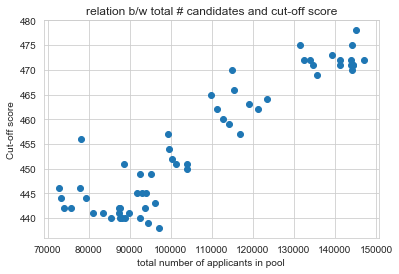

In [242]:
# total number of candidates and CRS
#scatter plot for above_450 and CRS
plt.scatter(data['total'], data['CRS'])
plt.xlabel('total number of applicants in pool')
plt.ylabel('Cut-off score')
plt.title('relation b/w total # candidates and cut-off score')
plt.show()

##### observation:-
As stated by the numbers above in corr(), there is a strong correlation between total candidates waiting in the pool and the cut-off score.

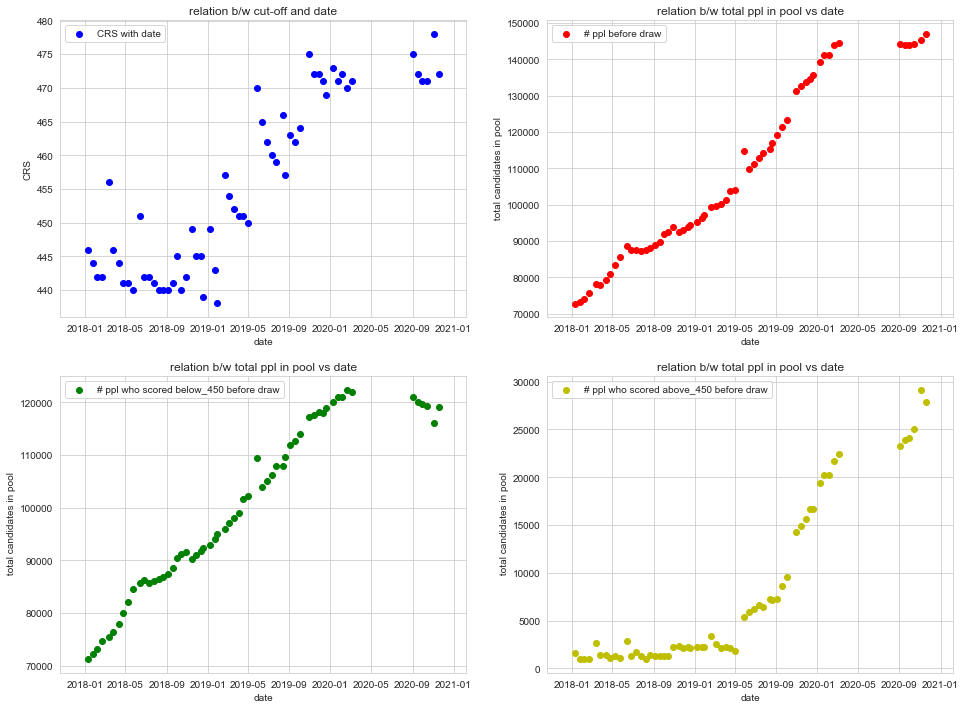

In [243]:
plt.figure(figsize=(16,12))

plt.subplot(221)
plt.scatter(data['Date'], data['CRS'], c= 'b', label = 'CRS with date')
plt.xlabel('date')
plt.ylabel('CRS')
plt.legend()
plt.title('relation b/w cut-off and date')

plt.subplot(222)
plt.scatter(data['Date'], data['total'],c= 'r', label = '# ppl before draw')
plt.xlabel('date')
plt.ylabel(' total candidates in pool')
plt.legend()
plt.title('relation b/w total ppl in pool vs date')

plt.subplot(223)
plt.scatter(data['Date'], data['below_450'],c= 'g', label = '# ppl who scored below_450 before draw')
plt.xlabel('date')
plt.ylabel(' total candidates in pool')
plt.legend()
plt.title('relation b/w total ppl in pool vs date')

plt.subplot(224)
plt.scatter(data['Date'], data['above_450'],c= 'y', label = '# ppl who scored above_450 before draw')
plt.xlabel('date')
plt.ylabel(' total candidates in pool')
plt.legend()
plt.title('relation b/w total ppl in pool vs date')

plt.show()

##### Observation:-
From the above two graph rows we realized that as the time increased, more and more people started entering the pool and scored better too resulting in higher cut-offs

###### for overall obervation, plotting pairplot

In [244]:
import warnings
warnings.filterwarnings("ignore")

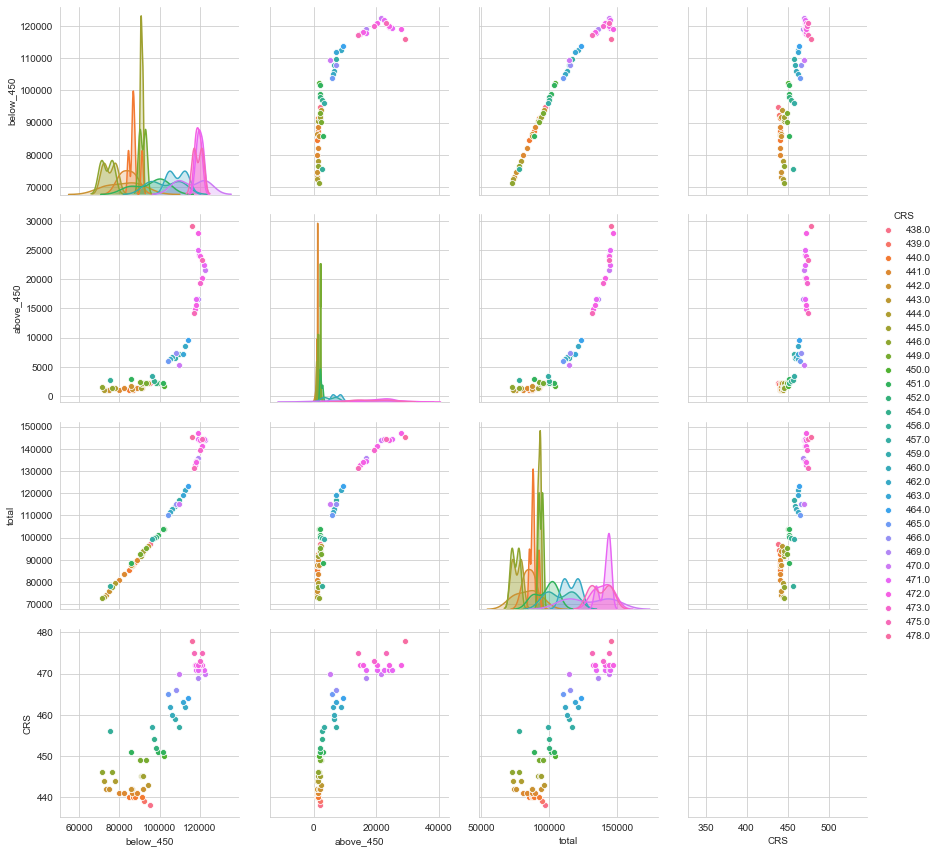

In [245]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="CRS", size=3)
plt.show()

##### pair-wise plot interesting observations:-
1. CRS score goes approx. above 470 when number of ppl below_450 in pool are approx 120000
2. CRS score lies aprx. between  457 and 468 when ppl below_450 are between 105000 and 120000
3. CRS score lies below 460 if ppl below_450 are less than 100000
********************************************************************************************************
4. CRS score is above 470 if #ppl with 450_above score are more than aprx 10000
5. CRS score is between 457 and 468 when ppl above_450 are between 5000 and 10000
6. CRS score lies below 460 if ppl above_450 are less than 5000
********************************************************************************************************
7. CRS score is above 470 if total #ppl in pool are more than aprx 125000
8. CRS score is between 470 and 457 if total #ppl in pool are aprx  between 105000 and 125000
9. CRS score is lower than 457 if total #ppl in pool are less than 105000


#### Univariate Analysis

##### below_450
Distribution plot

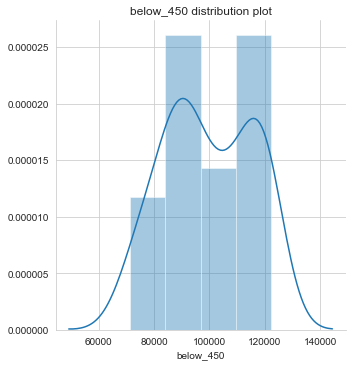

In [246]:
sns.FacetGrid(data, size=5).map(sns.distplot, "below_450")
plt.title('below_450 distribution plot')
plt.show()

###### Obsrvation:-
number of candidates who have had their scores below 450 are/were in 2 ranges:- a) between 70 to 90k and b)110k to 121k

##### above_450
distribution plot

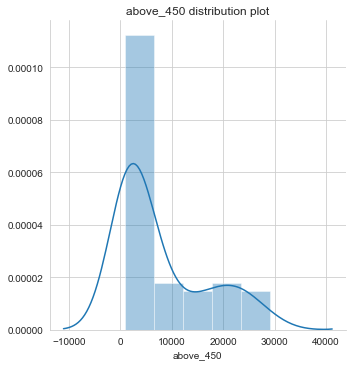

In [247]:
sns.FacetGrid(data, size=5).map(sns.distplot, "above_450")
plt.title('above_450 distribution plot')
plt.show()

###### Observation:-
Most of the candidates who scored more than 450 were below 6000 in numbers

#####  Total
distribution plot

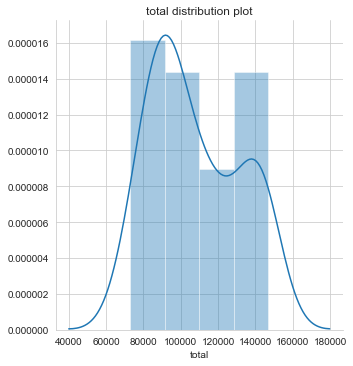

In [248]:
sns.FacetGrid(data, size=5).map(sns.distplot, "total")
plt.title('total distribution plot')
plt.show()

###### observation:-
Though the range of candidates waiting in pool is not very distinctive probably because the number of candidates were less in the begining and gradually were increasing. However, candidates between 70k to 90k has been the highest range so far.

In [249]:
# want to check the year wise distribution in the the number of candidates in the pool 

#### Bar Plot

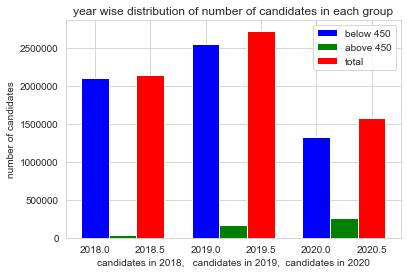

In [250]:
#total number of candidates in each year

plt.bar(2018 + 0.00, data['below_450'][data['Date'].dt.year == 2018].sum(), color = 'b', width = 0.25, label= 'below 450')
plt.bar(2018 + 0.25, data['above_450'][data['Date'].dt.year == 2018].sum(), color = 'g', width = 0.25, label= 'above 450')
plt.bar(2018 + 0.50, data['total'][data['Date'].dt.year == 2018].sum(), color = 'r', width = 0.25, label= 'total')

plt.bar(2019 + .00, data['below_450'][data['Date'].dt.year == 2019].sum(), color = 'b', width = 0.25)
plt.bar(2019 + .25, data['above_450'][data['Date'].dt.year == 2019].sum(), color = 'g', width = 0.25)
plt.bar(2019 + .50, data['total'][data['Date'].dt.year == 2019].sum(), color = 'r', width = 0.25)

plt.bar(2020 + .00, data['below_450'][data['Date'].dt.year == 2020].sum(), color = 'b', width = 0.25)
plt.bar(2020 + .25, data['above_450'][data['Date'].dt.year == 2020].sum(), color = 'g', width = 0.25)
plt.bar(2020 + .50, data['total'][data['Date'].dt.year == 2020].sum(), color = 'r', width = 0.25)

plt.title('year wise distribution of number of candidates in each group')
plt.ylabel('number of candidates')
plt.xlabel('candidates in 2018,   candidates in 2019,  candidates in 2020')
plt.legend()
plt.show()

##### observation:-
1. we can see the rise in candidates applying for immigration each year. However, there's a decline in the number of candidates in 2020 because of restrictions due to covid-19. Intrestingly, there's a significant rise in the applicants who are scoring above 450 and hence this probably is the reason for high cut-offs by every passing year.
2. Let's dig deep in cut-off scores' statistics

###### calculating median scores for each year

In [251]:
import math 
from statistics import median

In [252]:
med_crs_2018 = median(data['CRS'][data['Date'].dt.year == 2018])
print('median CRS score in 2018 is:', med_crs_2018)

median CRS score in 2018 is: 442.0


In [253]:
med_crs_2019 = median(data['CRS'][data['Date'].dt.year == 2019])
print('median CRS score in 2019 is:', med_crs_2019)
med_crs_2020 = median(data['CRS'][data['Date'].dt.year == 2020])
print('median CRS score in 2020 is:', med_crs_2020)

median CRS score in 2019 is: 461.0
median CRS score in 2020 is: 472.0


###### observation:-
year 2020 has shown an intresting trend that even as total number of applicants and applicants who scored below 450 have reduced due to covid, but more and more candidates are scoring high and that is the reason for high cut-off scores as seen in above median scores each year.

#### PDF, CDF

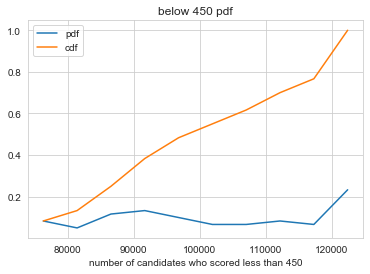

In [254]:
counts, bins= np.histogram(data['below_450'])
counts,bins
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins[1:], pdf, label= 'pdf')
plt.plot(bins[1:], cdf, label= 'cdf')
plt.title('below 450 pdf')
plt.xlabel('number of candidates who scored less than 450')
plt.legend()
plt.show()

###### observation:-
90% of the people who scored less than 450 are around 120000 in nunmbers 

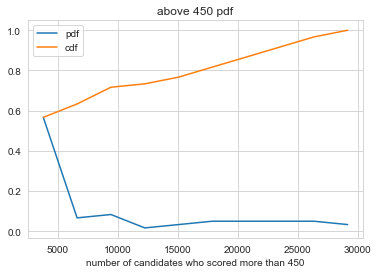

In [255]:
counts, bins= np.histogram(data['above_450'])
counts,bins
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins[1:], pdf, label= 'pdf')
plt.plot(bins[1:], cdf, label= 'cdf')
plt.title('above 450 pdf')
plt.xlabel('number of candidates who scored more than 450')
plt.legend()
plt.show()

###### observation:-
More than 50% of the candidates of all who have scored more than 450 are less than 5000 in numbers till date and approx 90% of the people are less than 22500 in numbers

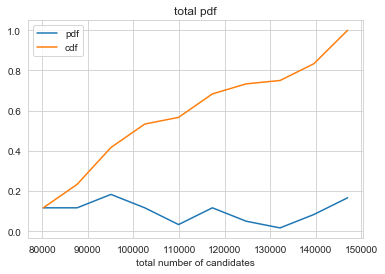

In [256]:
counts, bins= np.histogram(data['total'])
counts,bins
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bins[1:], pdf, label= 'pdf')
plt.plot(bins[1:], cdf, label= 'cdf')
plt.title('total pdf')
plt.xlabel('total number of candidates')
plt.legend()
plt.show()

###### Observation:-
90% of the total candidates are less than 150000 in the pool

#### Mean, Standard Deviation and Quantiles

In [257]:
#lets check statistics of above graphs
print('mean:')
print('below_450:',np.mean(data["below_450"]))
print('below_450:',np.mean(data["above_450"]))
print('total:',np.mean(data["total"]))
print('*******************************')
print('Standard deviation:')
print('below_450:',np.std(data["below_450"]))
print('above_450:',np.std(data["above_450"]))
print('toal:',np.std(data["total"]))

mean:
below_450: 99598.17380952383
below_450: 7769.083333333333
total: 107367.25714285715
*******************************
Standard deviation:
below_450: 15632.638066420797
above_450: 8513.499226310465
toal: 23264.19870390033


In [258]:
print("Quantiles:")

print('below_450:',np.percentile(data["below_450"],np.arange(0, 100, 25)))
print('above_450:',np.percentile(data["above_450"],np.arange(0, 100, 25)))
print('total:',np.percentile(data["total"], np.arange(0, 100, 25)))

print('*******************************************************************')

print("90th Percentiles:")

print('below_450:',np.percentile(data["below_450"],90))
print('above_450:',np.percentile(data["above_450"],90))
print('total:',np.percentile(data["total"], 90))

Quantiles:
below_450: [ 71211.    86759.25  97500.   116323.75]
above_450: [  955.    1410.75  2453.   14424.75]
total: [ 72818.    88530.75  99885.   131679.5 ]
*******************************************************************
90th Percentiles:
below_450: 120009.0
above_450: 22550.2
total: 144020.4


In [259]:
# Let's calculate the average and median score
print('Average CRS score:', np.mean(data['CRS']))
print('Median CRS Score:', np.median(data['CRS']))
print('**************************************************')
print('Average CRS score in 2018:',np.mean(data["CRS"][data['Date'].dt.year==2018]))
print('Average CRS score in 2019:',np.mean(data["CRS"][data['Date'].dt.year==2019]))
print('Average CRS score in 2020:',np.mean(data["CRS"][data['Date'].dt.year==2020]))


Average CRS score: 455.2
Median CRS Score: 451.5
**************************************************
Average CRS score in 2018: 443.36
Average CRS score in 2019: 459.6666666666667
Average CRS score in 2020: 472.3636363636364


In [260]:
#total number of draws each year
print('total number of express entry draws till 18-11-20:', data.shape[0])
print('number of draws in 2018:', data['draw'][data['Date'].dt.year==2018].count())
print('number of draws in 2019:', data['draw'][data['Date'].dt.year==2019].count())
print('number of draws in 2020:', data['draw'][data['Date'].dt.year==2020].count())

total number of express entry draws till 18-11-20: 60
number of draws in 2018: 25
number of draws in 2019: 24
number of draws in 2020: 11


### Conclusion
1. Number of draws have declined in 2020, most probably because of covid-19 scare.
2. We can approximate the average frequecy of draws to 15 days.
3. Our assumption for score separator was correct for 450 as per business case study because the avg and median scores are both around 450.
4. Although the number of people have reduced in the pool but people who have scored more than 450 have increased at good pace.
5. This implies that this feature of above_450 is also one of the most crucial features because avg and median scores each year have increased just as above_450 feature.
6. Though statistically by calculating Corr() it is valued less than total and below_450 that is probably because of lesser numbers of draws in 2020, but we'll keep this feature as important as others.
7. Almost all the values in all the features have had similar mean and median values, this implies that the data is well set and there are almost no outliers except a couple of values in CRS.
8. There's a strong correlation between features and CRS score, also among the features themselves.
9. Few Statistics:-
    1.CRS score goes approx. above 470 when number of ppl below_450 in pool are approx 120000
    
    2.CRS score lies aprx. between 457 and 468 when ppl below_450 are between 105000 and 120000
    
    3.CRS score lies below 460 if ppl below_450 are less than 100000
    
    4.CRS score is above 470 if #ppl with 450_above score are more than aprx 10000
    
    5.CRS score is between 457 and 468 when ppl above_450 are between 5000 and 10000
    
    6.CRS score lies below 460 if ppl above_450 are less than 5000
    
    7.CRS score is above 470 if total #ppl in pool are more than aprx 125000
    
    8.CRS score is between 470 and 457 if total #ppl in pool are aprx between 105000 and 125000
    
    9.CRS score is lower than 457 if total #ppl in pool are less than 105000
    
    mean:
    below_450: 99598.17
    below_450: 7769.09
    total: 107367.25
  
    Standard deviation:
    below_450: 15632.69
    above_450: 8513.50
    toal: 23264.110
    
    
10. Next, I'd like to see if by doing feature engineering such as the number of days between each draw and others can be of some value.

### Feature Engineering

##### Leveraging time series, we are creating window features where in we take the last 5 feature values average 

In [261]:
data.head()

,draw,below_450,above_450,total,CRS,Date
0,Draw 81,71211.0,1607.0,72818.0,446.0,2018-01-10
1,Draw 82,72307.0,998.0,73305.0,444.0,2018-01-24
2,Draw 83,73112.0,955.0,74067.0,442.0,2018-02-07
3,Draw 84,74778.0,1025.0,75803.0,442.0,2018-02-21
4,Draw 85,75456.0,2676.0,78132.0,456.0,2018-03-14


In [262]:
data[data.columns.values[1]][0]

71211.0

In [263]:
from statistics import mean

In [264]:
data

,draw,below_450,above_450,total,CRS,Date
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23


##### Calculating window features

In [265]:
# calculating the window features i.e last 3 average values for below_450, above_450, total and CRS

lists = [[], [], [], []]
cnt=-1

for col in range(1, data.shape[1]-1):
    cnt= cnt+1
    
    for row in range(3, data.shape[0]):
        temp_list = []
        
        for z in range(row-3, row):
            temp_list.append(data[data.columns.values[col]][z])
            
        lists[cnt].append(mean(temp_list))
        
print(len(lists[0]))

57


In [266]:
data[data.columns.values[1]][0]

71211.0

In [267]:
cnt=-1
for c in range(1, data.shape[1]-1):
    cnt=cnt+1
    
    for r in range(3):
        
        lists[cnt].insert(r,data[data.columns.values[c]][r])
        
print(len(lists[0]))
print(lists[0])

60
[71211.0, 72307.0, 73112.0, 72210.0, 73399.0, 74448.66666666667, 75562.33333333333, 76636.33333333333, 78151.66666666667, 80041.66666666667, 82208.33333333333, 84115.33333333333, 85507.66666666667, 85926.0, 86020.0, 86100.33333333333, 86459.33333333333, 86957.66666666667, 87610.66666666667, 88833.33333333333, 90091.0, 91127.33333333333, 91047.19047619047, 90949.66666666667, 90980.42857142857, 91701.28571428572, 92374.4761904762, 93140.7142857143, 94000.0, 95000.0, 96000.0, 97000.0, 98000.0, 99554.66666666667, 100939.66666666667, 104449.66666666667, 105226.33333333333, 106186.0, 105073.66666666667, 106354.0, 107342.66666666667, 108516.33333333333, 109845.0, 111397.0, 112791.66666666667, 114566.33333333333, 116209.0, 117651.0, 117937.0, 118409.0, 119001.0, 120000.0, 120674.0, 121470.66666666667, 121770.66666666667, 121763.33333333333, 120996.66666666667, 120289.0, 119711.66666666667, 118365.0]


######  adding window features to the main dataset

In [268]:
data['below_450_w'] = lists[0]
data

,draw,below_450,above_450,total,CRS,Date,below_450_w
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10,71211.000000
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24,72307.000000
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07,73112.000000
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21,72210.000000
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14,73399.000000
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26,74448.666667
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11,75562.333333
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25,76636.333333
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09,78151.666667
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23,80041.666667


In [269]:
data['above_450_w'] = lists[1]
data['total_w'] = lists[2]
data['crs_w'] = lists[3]
data

,draw,below_450,above_450,total,CRS,Date,below_450_w,above_450_w,total_w,crs_w
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10,71211.000000,1607.000000,72818.000000,446.000000
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24,72307.000000,998.000000,73305.000000,444.000000
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07,73112.000000,955.000000,74067.000000,442.000000
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21,72210.000000,1186.666667,73396.666667,444.000000
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14,73399.000000,992.666667,74391.666667,442.666667
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26,74448.666667,1552.000000,76000.666667,446.666667
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11,75562.333333,1685.333333,77247.666667,448.000000
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25,76636.333333,1817.000000,78453.333333,448.666667
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09,78151.666667,1282.000000,79433.666667,443.666667
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23,80041.666667,1270.666667,81312.333333,442.000000


###### observing window features statistically

In [270]:
data['below_450_w'].describe()

count        60.000000
mean      98078.690476
std       16062.525574
min       71211.000000
25%       86080.250000
50%       95500.000000
75%      113235.333333
max      121770.666667
Name: below_450_w, dtype: float64

In [271]:
data['above_450_w'].describe()

count       60.000000
mean      6877.444444
std       7751.884540
min        955.000000
25%       1593.250000
50%       2214.666667
75%       9042.083333
max      26105.333333
Name: above_450_w, dtype: float64

In [272]:
data['total_w'].describe()

count        60.000000
mean     104956.134921
std       23023.748215
min       72818.000000
25%       87651.250000
50%       98157.166667
75%      122277.416667
max      144470.333333
Name: total_w, dtype: float64

###### Observation:- The values in all three above features do not deviate much from original features as these are calculated from their means

##### adding one more feature representing the gap between two consecutive draws

In [273]:
#calculating the gap between each draw as days_gap

days_gap =[]

for i in range(1, data.shape[0]):
    days_gap.append((data['Date'][i]- data['Date'][i-1]).days)
    
days_gap.insert(0, median(days_gap))
print(len(days_gap))

60


In [274]:
data['days_gap'] = days_gap
data.head()

,draw,below_450,above_450,total,CRS,Date,below_450_w,above_450_w,total_w,crs_w,days_gap
0,Draw 81,71211.0,1607.0,72818.0,446.0,2018-01-10,71211.0,1607.000000,72818.000000,446.000000,14
1,Draw 82,72307.0,998.0,73305.0,444.0,2018-01-24,72307.0,998.000000,73305.000000,444.000000,14
2,Draw 83,73112.0,955.0,74067.0,442.0,2018-02-07,73112.0,955.000000,74067.000000,442.000000,14
3,Draw 84,74778.0,1025.0,75803.0,442.0,2018-02-21,72210.0,1186.666667,73396.666667,444.000000,14
4,Draw 85,75456.0,2676.0,78132.0,456.0,2018-03-14,73399.0,992.666667,74391.666667,442.666667,21


######  analysing days_gap feature

In [275]:
data['days_gap'].describe()

count     60.000000
mean      17.616667
std       21.919801
min        7.000000
25%       14.000000
50%       14.000000
75%       14.000000
max      182.000000
Name: days_gap, dtype: float64

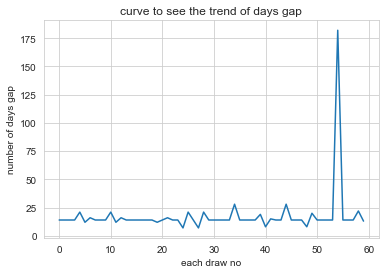

In [276]:
#plotting days_gap feature to understand the outlier behaviour
plt.plot(range(data.shape[0]), data['days_gap'])
plt.xlabel('each draw no')
plt.ylabel('number of days gap')
plt.title('curve to see the trend of days gap')
plt.show()

#####  Observation:-as we can observe the outlier in the days gap bcz of covid, let's replace this by second highest value from the feature

In [277]:
print('the second highest value for days gap is:', data['days_gap'][data['days_gap']< max(data['days_gap'])].max())

the second highest value for days gap is: 28


In [278]:
data['days_gap'].replace(182 , 28,  inplace=True)
data

,draw,below_450,above_450,total,CRS,Date,below_450_w,above_450_w,total_w,crs_w,days_gap
0,Draw 81,71211.000000,1607.0,72818.000000,446.0,2018-01-10,71211.000000,1607.000000,72818.000000,446.000000,14
1,Draw 82,72307.000000,998.0,73305.000000,444.0,2018-01-24,72307.000000,998.000000,73305.000000,444.000000,14
2,Draw 83,73112.000000,955.0,74067.000000,442.0,2018-02-07,73112.000000,955.000000,74067.000000,442.000000,14
3,Draw 84,74778.000000,1025.0,75803.000000,442.0,2018-02-21,72210.000000,1186.666667,73396.666667,444.000000,14
4,Draw 85,75456.000000,2676.0,78132.000000,456.0,2018-03-14,73399.000000,992.666667,74391.666667,442.666667,21
5,Draw 86,76453.000000,1355.0,77808.000000,446.0,2018-03-26,74448.666667,1552.000000,76000.666667,446.666667,12
6,Draw 87,78000.000000,1420.0,79420.000000,444.0,2018-04-11,75562.333333,1685.333333,77247.666667,448.000000,16
7,Draw 88,80002.000000,1071.0,81073.000000,441.0,2018-04-25,76636.333333,1817.000000,78453.333333,448.666667,14
8,Draw 89,82123.000000,1321.0,83444.000000,441.0,2018-05-09,78151.666667,1282.000000,79433.666667,443.666667,14
9,Draw 90,84500.000000,1056.0,85556.000000,440.0,2018-05-23,80041.666667,1270.666667,81312.333333,442.000000,14


#### Scaling

#####  creating sclaer and minmax objects

In [279]:
scaler = StandardScaler()

In [280]:
minmax = MinMaxScaler()

In [281]:
# Data Checkpoint
DATA = data.copy()

In [282]:
data = DATA.copy()

In [283]:
import pickle

data.to_pickle("./pro_data.pkl")

In [284]:
#not including draw bcz it is ID type categorical variable and removing 'CRS', the target variable
x_columns =['below_450', 'above_450', 'total',
       'below_450_w', 'above_450_w', 'total_w', 'crs_w', 'days_gap']

###### splitting data - Time based splitting

######  splitting the data based on time rather than randomness, keeping only 10% as test data bcz dataset is very small and we need few values from 2020 to make a good model

In [285]:

x_train_data=data[['below_450', 'above_450', 'total',
       'below_450_w', 'above_450_w', 'total_w', 'crs_w', 'days_gap']][data['Date']<= '2020-03-04']

print(x_train_data.shape)
x_train_data.head()


(54, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
0,71211.0,1607.0,72818.0,71211.0,1607.000000,72818.000000,446.000000,14
1,72307.0,998.0,73305.0,72307.0,998.000000,73305.000000,444.000000,14
2,73112.0,955.0,74067.0,73112.0,955.000000,74067.000000,442.000000,14
3,74778.0,1025.0,75803.0,72210.0,1186.666667,73396.666667,444.000000,14
4,75456.0,2676.0,78132.0,73399.0,992.666667,74391.666667,442.666667,21


In [286]:
x_test_data=data[['below_450', 'above_450', 'total',
       'below_450_w', 'above_450_w', 'total_w', 'crs_w', 'days_gap']][data['Date']> '2020-03-04']

print(x_test_data.shape)
x_test_data.head()

(6, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
54,121000.0,23245.0,144245.0,121770.666667,21453.666667,143224.333333,471.000000,28
55,120090.0,23928.0,144018.0,121763.333333,22456.666667,144220.000000,472.000000,14
56,119777.0,24097.0,143874.0,120996.666667,23215.333333,144212.000000,472.666667,14
57,119268.0,25070.0,144338.0,120289.000000,23756.666667,144045.666667,472.666667,14
58,116050.0,29149.0,145199.0,119711.666667,24365.000000,144076.666667,471.333333,22


In [287]:
y_train_data= data['CRS'][data['Date']<= '2020-03-04']

print(y_train_data.shape)
y_train_data.head()

(54,)


0    446.0
1    444.0
2    442.0
3    442.0
4    456.0
Name: CRS, dtype: float64

In [288]:
y_test_data= data['CRS'][data['Date']> '2020-03-04']

print(y_test_data.shape)
y_test_data.head()

(6,)


54    475.0
55    472.0
56    471.0
57    471.0
58    478.0
Name: CRS, dtype: float64

##### Standard scaling

In [289]:
scaler_x_train= scaler.fit(x_train_data)
x_train = pd.DataFrame(scaler_x_train.transform(x_train_data), columns= x_columns)
print(x_train.shape)
x_train.head()

(54, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
0,-1.751996,-0.654199,-1.468261,-1.644466,-0.613090,-1.406465,-0.565592,-0.200656
1,-1.678728,-0.749388,-1.444734,-1.570534,-0.722360,-1.381822,-0.748478,-0.200656
2,-1.624913,-0.756110,-1.407923,-1.516232,-0.730075,-1.343264,-0.931364,-0.200656
3,-1.513540,-0.745168,-1.324058,-1.577077,-0.688508,-1.377184,-0.748478,-0.200656
4,-1.468215,-0.487110,-1.211546,-1.496872,-0.723317,-1.326836,-0.870402,1.605250


In [290]:
# saving scaler_x_train
pickle.dump(scaler_x_train, open('scaler_x_train.pkl', 'wb'))

In [291]:

x_test = pd.DataFrame(scaler_x_train.transform(x_test_data), columns= x_columns)
print(x_test.shape)
x_test.head()

(6, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
0,1.576431,2.727909,1.982314,1.766086,2.947905,2.156151,1.720483,3.411157
1,1.515597,2.834665,1.971347,1.765591,3.127868,2.206532,1.811926,-0.200656
2,1.494672,2.861080,1.964391,1.713875,3.263992,2.206127,1.872888,-0.200656
3,1.460645,3.013164,1.986806,1.666139,3.361121,2.197711,1.872888,-0.200656
4,1.245520,3.650729,2.028401,1.627194,3.470271,2.199279,1.750964,1.863237


In [292]:
scaler_y_train= scaler.fit(y_train_data.values.reshape(-1,1))
y_train = pd.DataFrame(scaler_y_train.transform(y_train_data.values.reshape(-1,1)), columns= ['CRS'])
print(y_train.shape)
y_train.head()

(54, 1)


,CRS
0,-0.605360
1,-0.773430
2,-0.941499
3,-0.941499
4,0.234986


In [293]:
# saving scaler_y_train
pickle.dump(scaler_y_train, open('scaler_y_train.pkl', 'wb'))

In [294]:

y_test = pd.DataFrame(scaler_y_train.transform(y_test_data.values.reshape(-1,1)), columns= ['CRS'])
print(y_test.shape)
y_test.head()

(6, 1)


,CRS
0,1.831643
1,1.579539
2,1.495505
3,1.495505
4,2.083747


###### minmax scaling

In [295]:
minmax_x_train= minmax.fit(x_train)
X_train = pd.DataFrame(minmax_x_train.transform(x_train), columns= x_columns)
print(X_train.shape)
X_train.head()

(54, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
0,0.000000,0.030300,0.000000,0.000000,0.033008,0.000000,0.181818,0.333333
1,0.021415,0.001998,0.006806,0.021807,0.002177,0.007021,0.121212,0.333333
2,0.037144,0.000000,0.017455,0.037824,0.000000,0.018007,0.060606,0.333333
3,0.069697,0.003253,0.041716,0.019877,0.011728,0.008343,0.121212,0.333333
4,0.082944,0.079980,0.074265,0.043534,0.001907,0.022688,0.080808,0.666667


In [296]:
# saving minmax_x_train
pickle.dump(minmax_x_train, open('minmax_x_train.pkl', 'wb'))

In [297]:

X_test = pd.DataFrame(minmax_x_train.transform(x_test), columns= x_columns)
print(X_test.shape)
X_test.head()

(6, 8)


,below_450,above_450,total,below_450_w,above_450_w,total_w,crs_w,days_gap
0,0.972840,1.035877,0.998211,1.005969,1.037750,1.015076,0.939394,1.000000
1,0.955060,1.067618,0.995039,1.005823,1.088527,1.029431,0.969697,0.333333
2,0.948944,1.075472,0.993026,0.990569,1.126934,1.029315,0.989899,0.333333
3,0.938998,1.120690,0.999511,0.976489,1.154339,1.026917,0.989899,0.333333
4,0.876121,1.310252,1.011544,0.965002,1.185136,1.027364,0.949495,0.714286


In [298]:
minmax_y_train= minmax.fit(y_train)
Y_train = pd.DataFrame(minmax_y_train.transform(y_train), columns=['CRS'])
print(Y_train.shape)
Y_train.head()

(54, 1)


,CRS
0,0.216216
1,0.162162
2,0.108108
3,0.108108
4,0.486486


In [299]:
# saving minmax_y_train
pickle.dump(minmax_y_train, open('minmax_y_train.pkl', 'wb'))

#transforming y_test
Y_test = pd.DataFrame(minmax_y_train.transform(y_test), columns=['CRS'])
print(Y_test.shape)
Y_test.head()

(6, 1)


,CRS
0,1.000000
1,0.918919
2,0.891892
3,0.891892
4,1.081081


### Modelling

#### creating a random model to set the minimum worst performance

In [300]:
from statistics import mean

In [301]:
# our model will out put the average value for all datapoints

random_y = []
for row in range(X_train.shape[0]):
    random_y.append(mean(Y_train['CRS']))
    
print('firt 5 values:', random_y[:5])    
print(len(random_y))

firt 5 values: [0.4109109109109109, 0.4109109109109109, 0.4109109109109109, 0.4109109109109109, 0.4109109109109109]
54


#### measuring performance through MSE

In [302]:
from sklearn.metrics import mean_squared_error

In [303]:
random_train_error = mean_squared_error(Y_train, random_y)
print('random_train_error, MSE:', random_train_error)

random_train_error, MSE: 0.1034380226071918


In [304]:
random_y_test = []
for row in range(X_test.shape[0]):
    random_y_test.append(mean(Y_test['CRS']))
    
print('firt 5 values:', random_y_test[:5])    
print(len(random_y_test))

firt 5 values: [0.9504504504504505, 0.9504504504504505, 0.9504504504504505, 0.9504504504504505, 0.9504504504504505]
6


In [305]:
random_test_error = mean_squared_error(Y_test, random_y_test)
print('random_test_error, MSE:', random_test_error)

random_test_error, MSE: 0.004727700673646622


###### Observation:-
deviation of approx 0.132 in test data is not so good. However, this is just a random model which simply calculated the average values to get the prediction and hence we know the maximum deviation value

#### Linear Regression as our Base Model

In [306]:
# We choose linear regression because
#1. Since our dataset is small, Linear regression tends to work well with similar datasets
#2. Also, the loss function for Linear Regression is MSE which is also one of our KPI's

from sklearn.linear_model import Ridge

###### GridsearchCV for cross validation

In [307]:
from sklearn.model_selection import GridSearchCV
lr = Ridge()
parameters= {'alpha':[0.001,0.01,0.1,0.5,1,10,100]}

In [308]:
reg = GridSearchCV(lr, param_grid= parameters, cv=5, scoring= 'neg_mean_squared_error',  return_train_score=True )

In [309]:
reg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [310]:
results= pd.DataFrame.from_dict(reg.cv_results_)
results=results.sort_values(['param_alpha'])
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005583,5.222373e-03,0.002193,1.161985e-03,0.001,{'alpha': 0.001},-0.085580,-0.007732,-0.008720,-0.006963,...,-0.031151,0.031488,5,-0.003816,-0.005334,-0.004825,-0.005535,-0.004128,-0.004728,0.000666
1,0.002390,4.908277e-04,0.001396,4.885387e-04,0.01,{'alpha': 0.01},-0.076937,-0.007451,-0.007749,-0.007230,...,-0.030532,0.029658,4,-0.003865,-0.005425,-0.004943,-0.005631,-0.004318,-0.004836,0.000664
2,0.001995,3.504023e-07,0.001197,3.989220e-04,0.1,{'alpha': 0.1},-0.061909,-0.008608,-0.006524,-0.010739,...,-0.027060,0.023467,3,-0.004213,-0.006295,-0.006042,-0.006206,-0.005475,-0.005646,0.000771
3,0.002394,4.886945e-04,0.001197,3.989935e-04,0.5,{'alpha': 0.5},-0.043144,-0.014008,-0.008368,-0.017178,...,-0.019965,0.012143,2,-0.005401,-0.007969,-0.008166,-0.007637,-0.007586,-0.007352,0.000999
4,0.002593,4.886952e-04,0.000997,1.784161e-07,1,{'alpha': 1},-0.034118,-0.018161,-0.011022,-0.020846,...,-0.018439,0.009310,1,-0.007003,-0.009530,-0.010046,-0.009155,-0.009989,-0.009144,0.001119
5,0.002194,3.988982e-04,0.001197,3.989220e-04,10,{'alpha': 10},-0.015034,-0.045367,-0.026226,-0.039280,...,-0.042529,0.025492,6,-0.023441,-0.022648,-0.022846,-0.021507,-0.027872,-0.023663,0.002196
6,0.002194,3.986598e-04,0.000997,1.907349e-07,100,{'alpha': 100},-0.059816,-0.113378,-0.048604,-0.078144,...,-0.118382,0.093686,7,-0.078459,-0.068630,-0.076342,-0.072359,-0.051085,-0.069375,0.009747


###### plotting Cv and train grapgh to avoid over and underfitting

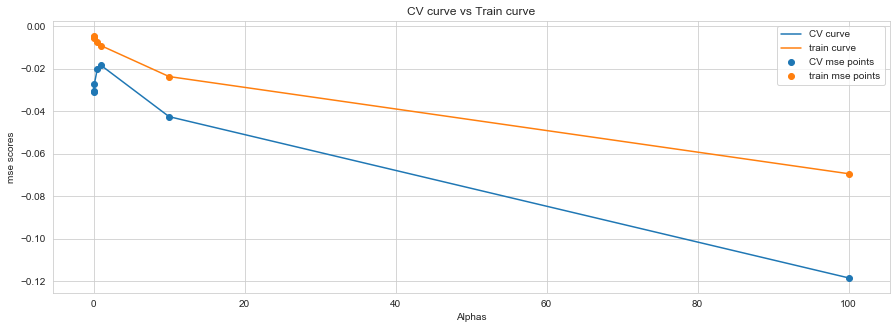

In [311]:
#plotting graph for train and cv values and alpha= 10 is the best value
cv_mse= results['mean_test_score']
train_mse= results['mean_train_score']
alpha_values= results['param_alpha']

plt.figure(figsize=(15,5))

plt.plot(alpha_values, cv_mse, label= 'CV curve')
plt.scatter(alpha_values, cv_mse, label= 'CV mse points')

plt.plot(alpha_values, train_mse, label= 'train curve')
plt.scatter(alpha_values, train_mse, label= 'train mse points')

plt.title('CV curve vs Train curve')
plt.xlabel('Alphas')
plt.ylabel('mse scores')
plt.legend()
plt.show()

In [312]:
# As seen from the above curve alpha=1 has best cv and test region, so we select 1 as the alpha value from our Ridge Model

final_lr = Ridge(alpha=1, random_state=1)

In [313]:
final_lr.fit(X_train, Y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=1, solver='auto', tol=0.001)

In [314]:
y_hat_tr = final_lr.predict(X_train)
y_hat_tr[:5]

array([[0.09792696],
       [0.08020055],
       [0.06692355],
       [0.09131394],
       [0.21826308]])

In [315]:
y_hat_te = final_lr.predict(X_test)
print(y_hat_te)

[[1.20253633]
 [0.98170508]
 [0.98749668]
 [0.99342112]
 [1.13925782]
 [1.00777941]]


In [316]:
print('y_hat_tr:', y_hat_tr.shape)
print('y_hat_te:', y_hat_te.shape)

y_hat_tr: (54, 1)
y_hat_te: (6, 1)


#####  MSE Calculation for Linear Regression Model (Ridge)

In [317]:
#  calculating mse for train data

print('Linear Regression Train MSE:',mean_squared_error(Y_train, y_hat_tr))

Linear Regression Train MSE: 0.009160673524770603


In [318]:
# calculating mse for test

final_lr_mse = mean_squared_error(Y_test, y_hat_te)
print('Linear Regression Test MSE:', final_lr_mse )

Linear Regression Test MSE: 0.012615374304546808


In [319]:
from sklearn.metrics import mean_absolute_error

#####  MAE Calculation

In [320]:
print('Linear Regression Train MAE:',mean_absolute_error(Y_train, y_hat_tr))

Linear Regression Train MAE: 0.07946065494731351


In [321]:
# calculating MAE for test
final_lr_mae = mean_absolute_error(Y_test, y_hat_te)
print('MAE for Test Linear Regression:', final_lr_mae)

MAE for Test Linear Regression: 0.10158228942325226


#####  Experimenting with KNN since our dataset is small and low dimension

In [322]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
param= {'n_neighbors': list(range(2,10))}
knn_reg = GridSearchCV(knn, param,  return_train_score=True )

In [323]:
knn_reg.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [324]:
results= pd.DataFrame.from_dict(knn_reg.cv_results_)
results=results.sort_values(['param_n_neighbors'])
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003325,0.000470,0.002992,0.000815,2,{'n_neighbors': 2},0.355517,0.279572,-0.873213,-0.079374,0.562184,1,0.965912,0.982868,0.867481,0.938753,0.050870
1,0.003657,0.001696,0.002659,0.000470,3,{'n_neighbors': 3},0.430377,0.431212,-2.680330,-0.606247,1.466598,2,0.962385,0.981941,0.791437,0.911921,0.085568
2,0.003325,0.001243,0.003657,0.000941,4,{'n_neighbors': 4},0.332558,0.401847,-3.996306,-1.087300,2.057172,3,0.930340,0.973202,0.750400,0.884647,0.096527
3,0.002327,0.000470,0.002660,0.000470,5,{'n_neighbors': 5},0.213682,0.389035,-3.976397,-1.124560,2.017823,4,0.921582,0.963983,0.710175,0.865246,0.111010
4,0.003989,0.000815,0.004655,0.000470,6,{'n_neighbors': 6},0.153152,0.380994,-4.313261,-1.259705,2.161193,5,0.892813,0.955719,0.658515,0.835682,0.127882
5,0.003324,0.000470,0.002660,0.000940,7,{'n_neighbors': 7},0.123330,0.378428,-4.379740,-1.292660,2.185378,6,0.882846,0.951857,0.617288,0.817331,0.144230
6,0.002659,0.000940,0.005318,0.002617,8,{'n_neighbors': 8},0.041302,0.425641,-4.668315,-1.400457,2.316045,7,0.877885,0.948807,0.580009,0.802234,0.159782
7,0.004654,0.000471,0.003989,0.000001,9,{'n_neighbors': 9},-0.078041,0.421343,-5.619755,-1.758818,2.737697,8,0.872852,0.944736,0.570391,0.795993,0.162202


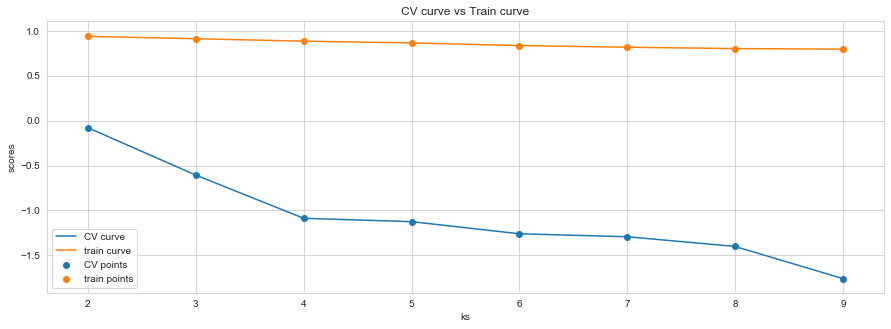

In [325]:
#plotting graph for train and cv values and alpha= 10 is the best value
cv_score= results['mean_test_score']
train_score= results['mean_train_score']
k_values= results['param_n_neighbors']

plt.figure(figsize=(15,5))

plt.plot(k_values, cv_score, label= 'CV curve')
plt.scatter(k_values, cv_score, label= 'CV points')

plt.plot(k_values, train_score, label= 'train curve')
plt.scatter(k_values, train_score, label= 'train points')

plt.title('CV curve vs Train curve')
plt.xlabel('ks')
plt.ylabel('scores')
plt.legend()
plt.show()

In [326]:
# as per above cureve, going for k=2
knn= KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,Y_train)
knn_hat_tr = knn.predict(X_train)
knn_hat_te = knn.predict(X_test)
print(knn_hat_te)

[[0.91891892]
 [0.87837838]
 [0.87837838]
 [0.87837838]
 [0.87837838]
 [0.87837838]]


#####  Calculating MSE for KNN

In [327]:
#  calculating mse for train data

print('KNN Train MSE:',mean_squared_error(Y_train, knn_hat_tr))

KNN Train MSE: 0.003131509888266645


In [328]:
#  calculating mse for train data

print('KNN Test MSE:',mean_squared_error(Y_test, knn_hat_te))

KNN Test MSE: 0.008552471390309234


##### Calculating MAE for KNN

In [329]:
print('KNN Train MSE:',mean_absolute_error(Y_train, knn_hat_tr))
print('KNN Test MSE:',mean_absolute_error(Y_test, knn_hat_te))

KNN Train MSE: 0.03653653653653655
KNN Test MSE: 0.06531531531531533


#### Decision Tree Model

In [330]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param= {'max_depth': list(range(1,4))}
dt_reg = GridSearchCV(dt, param,  return_train_score=True)

In [331]:
dt_reg.fit(X_train, Y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [332]:
results= pd.DataFrame.from_dict(dt_reg.cv_results_)
results=results.sort_values(['param_max_depth'])
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002660,4.696848e-04,0.001995,8.143934e-04,1,{'max_depth': 1},-0.499686,0.443268,-2.383222,-0.813213,1.175014,3,0.786987,0.860576,0.616228,0.754597,0.102350
1,0.002330,4.735620e-04,0.001660,4.685141e-04,2,{'max_depth': 2},-0.002890,0.046061,-0.003813,0.013119,0.023296,1,0.931122,0.974067,0.869851,0.925013,0.042765
2,0.001995,1.946680e-07,0.001995,2.973602e-07,3,{'max_depth': 3},-0.419961,-0.225297,-0.170639,-0.271966,0.107001,2,0.968324,0.991061,0.915894,0.958426,0.031475


In [333]:
dt_reg.best_params_

{'max_depth': 2}

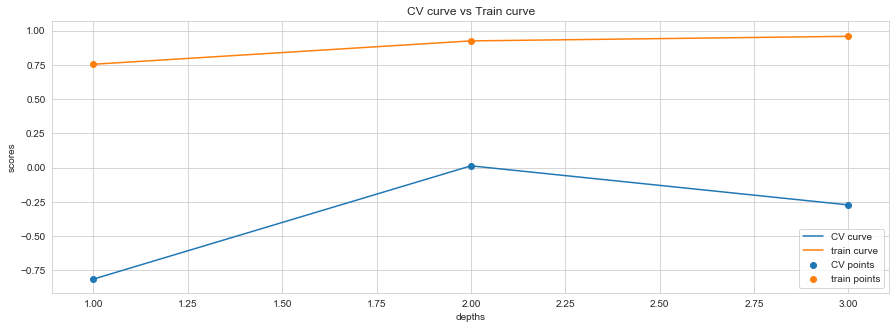

In [334]:
#plotting graph for train and cv values and alpha= 10 is the best value
cv_score= results['mean_test_score']
train_score= results['mean_train_score']
depth_values= results['param_max_depth']

plt.figure(figsize=(15,5))

plt.plot(depth_values, cv_score, label= 'CV curve')
plt.scatter(depth_values, cv_score, label= 'CV points')

plt.plot(depth_values, train_score, label= 'train curve')
plt.scatter(depth_values, train_score, label= 'train points')

plt.title('CV curve vs Train curve')
plt.xlabel('depths')
plt.ylabel('scores')
plt.legend()
plt.show()

In [335]:
# selecting depth =2 as shown in the above graph and fitting in the model

dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train,Y_train)
dt_hat_tr= dt.predict(X_train)
dt_hat_te = dt.predict(X_test)
print(dt_hat_tr[:5])
print(dt_hat_te)

[0.14478764 0.14478764 0.14478764 0.14478764 0.14478764]
[0.90810811 0.90810811 0.90810811 0.90810811 0.90810811 0.90810811]


#####  Calculating DT MSE and MAE

In [336]:
print('DT Train MSE:',mean_squared_error(Y_train, dt_hat_tr))
print('DT Test MSE:',mean_squared_error(Y_test, dt_hat_te))
print('*****************************************************')
print('DT Train MAE:',mean_absolute_error(Y_train, dt_hat_tr))
print('DT Test MAE:',mean_absolute_error(Y_test, dt_hat_te))

DT Train MSE: 0.008524881497854471
DT Test MSE: 0.006520574628682746
*****************************************************
DT Train MAE: 0.06857636857636858
DT Test MAE: 0.0531531531531532


#### Ensemble Modeling:- Bagging (Random Forest)

In [337]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
oob_lst= []
for n_tree in range(32,65):
    rf= RandomForestRegressor(n_estimators= n_tree, oob_score= True)
    rf.fit(X_train, Y_train)
    oob_lst.append(rf.oob_score_)

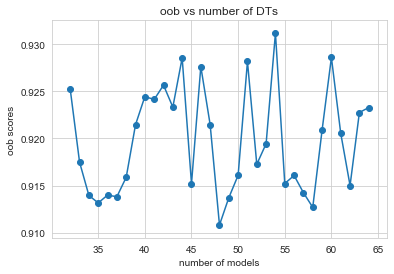

In [339]:
#plotting to see training performance
plt.plot(list(range(32,65)), oob_lst, label='cv score line')
plt.scatter(list(range(32,65)), oob_lst, label='cv scores')
plt.xlabel('number of models')
plt.ylabel('oob scores')
plt.title('oob vs number of DTs')
plt.show()

In [340]:
#finalizing number of trees = 49, as the this has lowest mse as oob_score, as shown in graph above

In [341]:
rf= RandomForestRegressor(n_estimators= 49)
rf.fit(X_train, Y_train)
rf_hat_tr= rf.predict(X_train)
rf_hat_te = rf.predict(X_test)
print(rf_hat_tr[:5])
print(rf_hat_te)

[0.19580805 0.15444015 0.1241037  0.12300055 0.39658025]
[0.92112521 0.87755102 0.87920574 0.87920574 0.90568119 0.87975731]


#####  Calculating MSE and MAE for RF

In [342]:
print('RF Train MSE:',mean_squared_error(Y_train, rf_hat_tr))
print('RF Test MSE:',mean_squared_error(Y_test, rf_hat_te))
print('*****************************************')
print('RF Train MAE:',mean_absolute_error(Y_train, dt_hat_tr))
print('RF Test MAE:',mean_absolute_error(Y_test, rf_hat_te))

RF Train MSE: 0.001415719444243596
RF Test MSE: 0.006758861025664253
*****************************************
RF Train MAE: 0.06857636857636858
RF Test MAE: 0.06002941717227415


#### Boosting:- GBDT

In [343]:
from sklearn.ensemble import GradientBoostingRegressor

score_lst= []
for m in range(32,257):
    
    gbdt = GradientBoostingRegressor(n_estimators= m, max_depth=2)
    gbdt.fit(X_train,Y_train)
    score_lst.append(gbdt.train_score_)

In [344]:
# fetching the final training scores
train_score=[]
for i in score_lst:
    train_score.append(i[-1])
print(len(train_score))

225


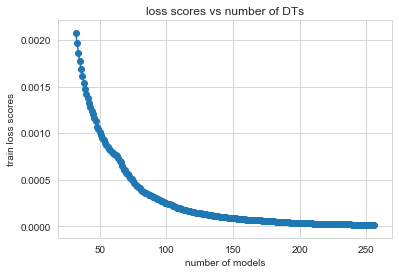

In [345]:
#plotting to see training performance
plt.plot(list(range(32,257)), train_score, label='score line')
plt.scatter(list(range(32,257)), train_score, label='scores')
plt.xlabel('number of models')
plt.ylabel('train loss scores')
plt.title('loss scores vs number of DTs')
plt.show()

In [346]:
# as from above graph selecting 256 as number of trees

gbdt = GradientBoostingRegressor(n_estimators= 256, max_depth=2)
gbdt.fit(X_train,Y_train)

gbdt_hat_tr= gbdt.predict(X_train)
gbdt_hat_te= gbdt.predict(X_test)

print(gbdt_hat_tr[:5])
print(gbdt_hat_te)

[0.21418159 0.16033312 0.10908315 0.11399721 0.48354827]
[0.9980661  0.88622364 0.88668044 0.88748197 0.95185254 0.88514398]


#####  Calculatng MSE and MAE for GBDT

In [347]:
print('GBDT Train MSE:',mean_squared_error(Y_train, gbdt_hat_tr))
print('GBDT Test MSE:',mean_squared_error(Y_test, gbdt_hat_te))
print('*****************************************')
print('GBDT Train MAE:',mean_absolute_error(Y_train, gbdt_hat_tr))
print('GBDT Test MAE:',mean_absolute_error(Y_test, gbdt_hat_te))

GBDT Train MSE: 1.4228967196440351e-05
GBDT Test MSE: 0.003160014966977961
*****************************************
GBDT Train MAE: 0.0031675632474617876
GBDT Test MAE: 0.03454233727873762


#### ARIMA Modeling

#####  Firstly, ensuring if there's some pattern between time and target
Plotting date vs crs

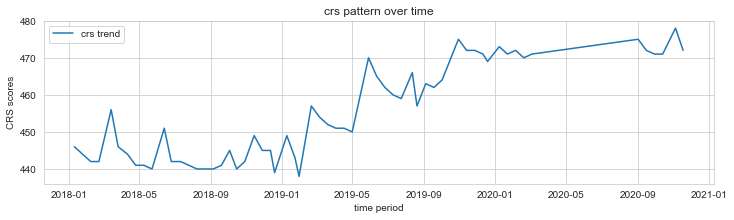

In [348]:
plt.figure(figsize=(12,3))
plt.plot(data['Date'], data['CRS'],  label= 'crs trend')
plt.xlabel('time period')
plt.ylabel('CRS scores')
plt.title('crs pattern over time')
plt.legend()
plt.show()

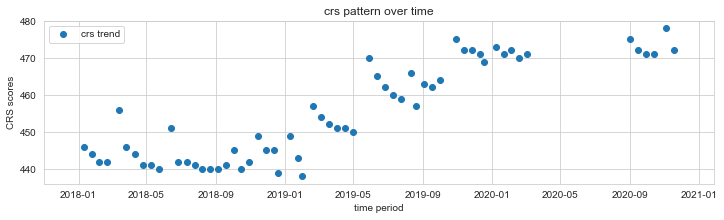

In [349]:
# there's a trend but far from perfect. However, let's checkout scatter plot
plt.figure(figsize=(12,3))
plt.scatter(data['Date'], data['CRS'],  label= 'crs trend')
plt.xlabel('time period')
plt.ylabel('CRS scores')
plt.title('crs pattern over time')
plt.legend()
plt.show()

###### Observation:- There's an upward trend as we can notice from the graph above, however this is not a stationary movement and has randomness. But due to it's upward trend we can ARIMA model a try

######  To begin with, let's check the auto correlation with ACF plot

In [350]:
from pandas.plotting import autocorrelation_plot

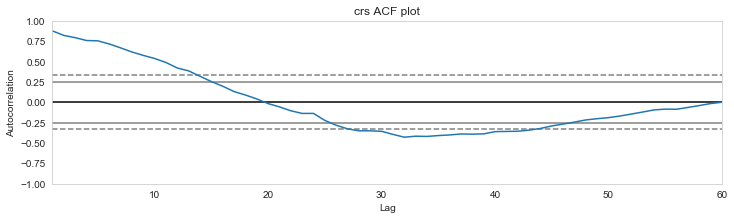

In [351]:
# checking auto correlation using ACF plot
plt.figure(figsize=(12,3))
autocorrelation_plot(data['CRS'])
plt.title('crs ACF plot')
plt.show()

In [352]:
# from the above graph, we can see that the last 3 values have correlation more than 80%. So, going ahead with k=3 as the starting point


In [353]:
from statsmodels.tsa.arima_model import ARIMA

In [354]:
# fitting train model i.e with first 54 rows
model = ARIMA(data['CRS'], order=(3,1,0))

In [355]:
# fitting
model_fit = model.fit()

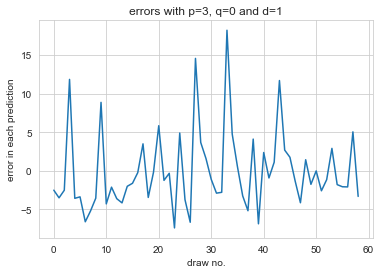

In [356]:
# checking train errors
errors = pd.DataFrame(model_fit.resid)
plt.plot(range(errors.shape[0]), errors)
plt.title('errors with p=3, q=0 and d=1')
plt.xlabel('draw no.')
plt.ylabel('error in each prediction')
plt.show()

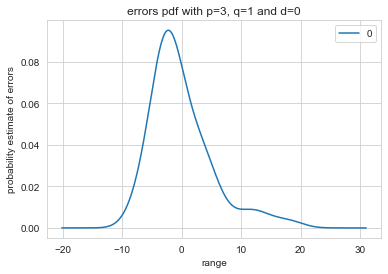

In [357]:
# pdf plot of errors
errors.plot.kde()
plt.title('errors pdf with p=3, q=1 and d=0')
plt.xlabel('range')
plt.ylabel('probability estimate of errors')
plt.show()

In [358]:
# errors description
print(errors.describe())

               0
count  59.000000
mean   -0.058970
std     5.171665
min    -7.391283
25%    -3.407203
50%    -1.611715
75%     2.064354
max    18.206393


In [359]:
# trying other combinations 
import itertools
a = [[3],[1],[0,1]]
b= list(itertools.product(*a))
print(b)
print(len(b))

[(3, 1, 0), (3, 1, 1)]
2


In [360]:
# keeping our objective to minimize mean error, lets try to hypertune p,q,d
mean_error= []
for i in b:
        model= ARIMA(data['CRS'], order= i)
        model_fit = model.fit()
        pdq_error = [i, model_fit.resid.mean()]
        mean_error.append(pdq_error)


In [361]:
print(mean_error)

[[(3, 1, 0), -0.05897041624733891], [(3, 1, 1), -0.058379686834107936]]


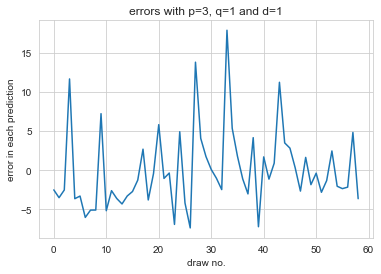

In [362]:
# as per above observation:- selecting 3,1,1 as p,d and q

model= ARIMA(data['CRS'], order= (3,1,1))
model_fit = model.fit()
errors = pd.DataFrame(model_fit.resid)
plt.plot(range(errors.shape[0]), errors)
plt.title('errors with p=3, q=1 and d=1')
plt.xlabel('draw no.')
plt.ylabel('error in each prediction')
plt.show()

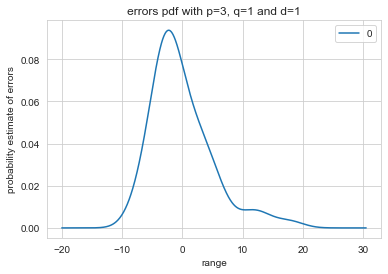

In [363]:
# pdf plot of above errors 
errors.plot.kde()
plt.title('errors pdf with p=3, q=1 and d=1')
plt.xlabel('range')
plt.ylabel('probability estimate of errors')
plt.show()

In [364]:
# errors description
print(errors.describe())

               0
count  59.000000
mean   -0.058380
std     5.060966
min    -7.356606
25%    -3.288952
50%    -1.259647
75%     2.118988
max    17.847129


##### As per above  observations :- p=3, d=1,q=1  gives best values
testing and predicting:-

In [365]:
#since we have seasonality in our data we import SARIMAX
import statsmodels.api as sm

In [366]:
model= sm.tsa.statespace.SARIMAX(data['CRS'], order= (3,1,1), seasonal_order=(3,1,1,12))
results=model.fit()

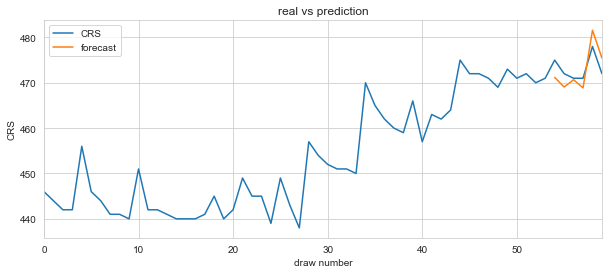

In [367]:
# predicting and plotting

data['forecast']=results.predict(start=54,end=59,dynamic=True)

data[['CRS', 'forecast']].plot(figsize=(10,4))
plt.title('real vs prediction')
plt.ylabel('CRS')
plt.xlabel('draw number')
plt.show()

In [368]:
#for comparing the results with the other models we need to scale the predictions
# standard_scaling
scaler_arima= scaler.fit(data['forecast'][-6:].values.reshape(-1,1))
arima_hat_te= scaler_arima.transform(data['forecast'][-6:].values.reshape(-1,1))
print(arima_hat_te)

[[-0.36034084]
 [-0.83451103]
 [-0.47658145]
 [-0.87486459]
 [ 1.95849973]
 [ 0.58779818]]


In [369]:
# minmax scaling
minmax_arima= scaler.fit(arima_hat_te.reshape(-1,1))
arima_hat_te= minmax_arima.transform(arima_hat_te.reshape(-1,1))
print(arima_hat_te)

[[-0.36034084]
 [-0.83451103]
 [-0.47658145]
 [-0.87486459]
 [ 1.95849973]
 [ 0.58779818]]


In [370]:

print('ARIMA Test MSE:',mean_squared_error(Y_test, arima_hat_te))
print('*****************************************')
print('ARIMA Test MAE:',mean_absolute_error(Y_test, arima_hat_te))

ARIMA Test MSE: 1.7997826612229708
*****************************************
ARIMA Test MAE: 1.2429233332599787


#### StackingCv Regressor

In [371]:
from mlxtend.regressor import StackingCVRegressor

In [372]:
# using are aforementioned models for training StackingCv Regressor

reg1= Ridge()
reg2= KNeighborsRegressor()
reg3= DecisionTreeRegressor(max_depth=2)
reg4= RandomForestRegressor(n_estimators= 41)
reg5= GradientBoostingRegressor(n_estimators= 256, max_depth=2)

In [373]:
#keeping linear regressor i.e Ridge as our meta regressor as linear models tend to do well as meta models
stack = StackingCVRegressor(regressors=(reg1, reg2, reg3, reg4, reg5),
                            meta_regressor=reg1)

In [374]:
Y_train.shape

(54, 1)

In [375]:
stack_fit = stack.fit(X_train.values.reshape(-1,8), Y_train.values.reshape(-1))

In [376]:
stack_hat_te= stack_fit.predict(X_test)
print(stack_hat_te)

[1.00405122 0.91803751 0.91942856 0.9209333  0.97934175 0.92308266]


In [377]:
stack_hat_tr= stack_fit.predict(X_train) 
print(stack_hat_tr.shape)

(54,)


In [378]:
print('Stack Train MSE:',mean_squared_error(Y_train, stack_hat_tr))
print('Stack Test MSE:',mean_squared_error(Y_test, stack_hat_te))
print('*****************************************')
print('Stack Train MAE:',mean_absolute_error(Y_train, stack_hat_tr))
print('Stack Test MAE:',mean_absolute_error(Y_test, stack_hat_te))

Stack Train MSE: 0.0019723588373711577
Stack Test MSE: 0.0019978481041382943
*****************************************
Stack Train MAE: 0.03534644559393333
Stack Test MAE: 0.027902297298640244


In [379]:
#with meta regressor as GBDT
reg1= Ridge()
reg2= KNeighborsRegressor()
reg3= DecisionTreeRegressor(max_depth=2)
reg4= RandomForestRegressor(n_estimators= 41)
reg5= GradientBoostingRegressor(n_estimators= 256, max_depth=2)

stack_2 = StackingCVRegressor(regressors=(reg1, reg2, reg3, reg4, reg5),
                            meta_regressor=reg5)



In [380]:
stack_2_fit= stack_2.fit(X_train.values.reshape(-1,8), Y_train.values.reshape(-1))

In [381]:
stack_hat_te_2= stack_2_fit.predict(X_test)
stack_hat_tr_2= stack_2_fit.predict(X_train) 

In [382]:
print('Stack Train MSE:',mean_squared_error(Y_train, stack_hat_tr_2))
print('Stack Test MSE:',mean_squared_error(Y_test, stack_hat_te_2))
print('*****************************************')
print('Stack Train MAE:',mean_absolute_error(Y_train, stack_hat_tr_2))
print('Stack Test MAE:',mean_absolute_error(Y_test, stack_hat_te_2))

Stack Train MSE: 0.0038645952218911593
Stack Test MSE: 0.0038318845387113436
*****************************************
Stack Train MAE: 0.05105274453857039
Stack Test MAE: 0.04102068568221565


#### Custom Stacking Model Implementation

In [383]:
#1. Since we already have our train set, let's split it 50:50

from sklearn.model_selection import train_test_split

X_train_, X_test_, Y_train_, Y_test_ = train_test_split(X_train, Y_train, test_size=0.50, random_state=0)

print(X_train_.shape)
print(X_test_.shape)
print(Y_train_.shape)
print(Y_test_.shape)

(27, 8)
(27, 8)
(27, 1)
(27, 1)


In [384]:
train_50 = pd.concat([X_train_, Y_train_], axis=1)
train_50.shape

(27, 9)

In [385]:
test_50 = pd.concat([X_test_, Y_test_], axis=1)
test_50.shape

(27, 9)

In [386]:
# step 2. Creating a fuction for k sampling with rows replacement

def sampling(dataset, k):
    """ this function creates k unique samples of a dataset"""
    
    df_list =np.empty([k,20,9])
    
    for df in range(k):
        df_list[df] = dataset.sample(20, random_state= df)
        
    return df_list
    

In [387]:
#checking function
df_list= sampling(train_50, 10)
print(len(df_list))
print(df_list[0].shape)
print(df_list[9][:2])

10
(20, 9)
[[0.21321245 0.01700902 0.14850115 0.13809615 0.01655445 0.09538067
  0.11111111 0.33333333 0.08108108]
 [0.75232029 0.28859559 0.6157641  0.71889985 0.29534754 0.59563537
  0.65656566 0.04761905 0.51351351]]


In [388]:
#step 3. Create k models to train k datasets

def grid_depth(dataset_list):
    
    """ this function hypertunes depth of k Decision Tree models """
    
    best_depth= []
    
    for data in dataset_list:
        
        param= {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
        model= DecisionTreeRegressor()
        grid = GridSearchCV(model, param)
        
        grid.fit(data[:,:8], data[:,-1:])
        
        best_depth.append(list(grid.best_params_.values()))
        
    return best_depth

In [389]:
best_depth= grid_depth(df_list)
best_depth

[[6], [5], [3], [3], [2], [7], [10], [6], [1], [10]]

In [390]:
#setting DT model with depths as above:

models= []

for i in range(len(best_depth)):
    for depth in best_depth[i]:
      
        model= DecisionTreeRegressor(max_depth= depth, random_state=1)
        model.fit(df_list[i][:,:8], df_list[i][:,-1:])
        models.append(model)
        
print(len(models))
print(models[1])

10
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')


In [391]:
#step4. passing d2 set in these k models

pred_input= []

for m in models:
    pred_input.append(m.predict(test_50.values[:,:8]))
    
print(len(pred_input))
print(pred_input[0])

10
[0.86486486 0.08108108 0.89189189 0.18918919 0.05405405 0.16216216
 0.18918919 0.67567568 1.         0.18918919 0.2972973  0.2972973
 0.2972973  0.08108108 0.64864865 0.64864865 0.64864865 0.08108108
 0.05405405 0.2972973  0.64864865 0.86486486 0.08108108 0.86486486
 0.18918919 0.08108108 0.10810811]


In [392]:
pred_input= np.array(pred_input)
pred_input.shape

(10, 27)

In [393]:
pred_input= pred_input.T
print(pred_input.shape)

(27, 10)


In [394]:
# step5. Creating meta linear regression model
meta_lr = Ridge()

In [395]:
meta_lr.fit(pred_input, test_50.values[:,-1:])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [396]:
meta_pred_tr = meta_lr.predict(pred_input)
meta_pred_tr.shape

(27, 1)

In [397]:
print('Meta cv MSE:',mean_squared_error(test_50.values[:,-1:], meta_pred_tr))

Meta cv MSE: 0.013447441844743571


In [398]:
def tune_samples():
    
    meta_mse= {}
    for s in range(2,201,2):
        
        df_list= sampling(train_50, s)
        best_depth= grid_depth(df_list)
        
        #fittng model
        models= []

        for i in range(len(best_depth)):
            for depth in best_depth[i]:

                model= DecisionTreeRegressor(max_depth= depth, random_state=1)
                model.fit(df_list[i][:,:8], df_list[i][:,-1:])
                models.append(model)
                
        #training model
        
        pred_input= []

        for m in models:
            pred_input.append(m.predict(test_50.values[:,:8]))
            
        pred_input= np.array(pred_input)
        pred_input= pred_input.T
        
        #putting predictions into meta model
        
        meta_lr = Ridge()
        meta_lr.fit(pred_input, test_50.values[:,-1:])
        
        #predicting
        meta_pred_tr = meta_lr.predict(pred_input)
        
        meta_mse.update({s :mean_squared_error(test_50.values[:,-1:], meta_pred_tr)})
    
    return meta_mse

In [399]:
meta_mse= tune_samples()
print(len(meta_mse))

100


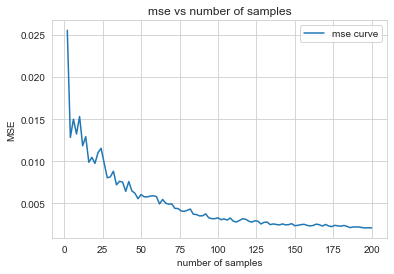

In [400]:
#plot mse vs number of samples

plt.plot(list(meta_mse.keys()), list(meta_mse.values()), label= 'mse curve')
plt.xlabel('number of samples')
plt.ylabel('MSE')
plt.title('mse vs number of samples')
plt.legend()
plt.show()

In [401]:
# as per the above graph we can see that the mse decreses as the number of samples increase but after 
#75 samples the decrease is slight. Going with the trend and selecting 75 as number of samples
# first fittng and traing and then testing with the rest of the data

df_list= sampling(train_50, 75)
best_depth= grid_depth(df_list)

models= []

for i in range(len(best_depth)):
    for depth in best_depth[i]:
      
        model= DecisionTreeRegressor(max_depth= depth, random_state=1)
        model.fit(df_list[i][:,:8], df_list[i][:,-1:])
        models.append(model)
        
pred_input= []

for m in models:
    pred_input.append(m.predict(test_50.values[:,:8]))
    
pred_input= np.array(pred_input)
pred_input= pred_input.T

#putting predictions into meta model

meta_lr = Ridge()
meta_lr.fit(pred_input, test_50.values[:,-1:])

#predicting
meta_pred_tr = meta_lr.predict(pred_input)

print('train mean_squared_error:', mean_squared_error(test_50.values[:,-1:], meta_pred_tr))

print('train mean_absolute_error:', mean_absolute_error(test_50.values[:,-1:], meta_pred_tr))


train mean_squared_error: 0.003966947953344579
train mean_absolute_error: 0.04908849130020568


In [402]:
#testing
pred_input_te=[]
for m in models:
    pred_input_te.append(m.predict(X_test.values[:,:8]))
    
pred_input_te= np.array(pred_input_te)
pred_input_te= pred_input_te.T

#putting predictions into meta model

meta_pred_te = meta_lr.predict(pred_input_te)

print('test mean_squared_error:', mean_squared_error(Y_test, meta_pred_te))
print('test mean_absolute_error:', mean_absolute_error(Y_test, meta_pred_te))

test mean_squared_error: 0.007784186267235842
test mean_absolute_error: 0.06036101546794063


In [412]:
from prettytable import PrettyTable
x = PrettyTable()

In [413]:
x.field_names= ['Model', 'Test MSE', 'Test MAE']
x.add_row(['Linear Regression', '0.012', '0.101'])
x.add_row(['K-NN', '0.008', '0.065'])
x.add_row(['Decision Tree', '0.006', '0.053'])
x.add_row(['Random Forest', '0.006', '0.060'])
x.add_row(['GBDT', '0.003', '0.034'])
x.add_row(['ARIMA', '0.65', '0.77'])
x.add_row(['StackingCv-Reg', '0.0019', '0.027'])
x.add_row(['StackingCv-GBDT', '0.003', '0.041'])
x.add_row(['CustomCv-Reg', '0.007', '0.060'])
print(x)

+-------------------+----------+----------+
|       Model       | Test MSE | Test MAE |
+-------------------+----------+----------+
| Linear Regression |  0.012   |  0.101   |
|        K-NN       |  0.008   |  0.065   |
|   Decision Tree   |  0.006   |  0.053   |
|   Random Forest   |  0.006   |  0.060   |
|        GBDT       |  0.003   |  0.034   |
|       ARIMA       |   0.65   |   0.77   |
|   StackingCv-Reg  |  0.0019  |  0.027   |
|  StackingCv-GBDT  |  0.003   |  0.041   |
|    CustomCv-Reg   |  0.007   |  0.060   |
+-------------------+----------+----------+


####  As per our observation from summary above StackingCv-Reg and GBDT models tend to out-perform others. In our case, StackingCv-Reg has better Test MSE and MAE values

####  if a simple model is required then: linear regression weights and intercept for RIdge


In [405]:
weights= final_lr.coef_
print('weights',weights)

weights [[0.12405896 0.162083   0.13747349 0.10514891 0.02249018 0.08259721
  0.31203188 0.35265263]]


In [406]:
intercept = final_lr.intercept_
intercept

array([-0.08201049])

In [407]:
feature_weights= dict(zip(x_columns,weights[0]))
print(feature_weights)

{'below_450': 0.12405896172869191, 'above_450': 0.162082999420643, 'total': 0.13747349009637527, 'below_450_w': 0.10514890881294042, 'above_450_w': 0.022490175594799242, 'total_w': 0.08259720993396248, 'crs_w': 0.3120318798582529, 'days_gap': 0.35265263005443703}


#####  Observation:- Intrestingly, our window features such as days_gap, crs_w are the top features, followed by above_450 feature

#### Conclusion:-
As per our observation from summary above StackingCv-Reg and GBDT models tend to out-perform others. In our case, StackingCv-Reg has better Test MSE and MAE values. It uses the best of all models.

##### Saving STacking RegressorCV model in pickle

In [414]:
import pickle

In [415]:
model_file= 'final_model.sav'

In [416]:
pickle.dump(stack_fit, open(model_file, 'wb'))